In [1]:
%%capture
import vaex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from datetime import datetime
from dateutil.relativedelta import relativedelta
import calendar
import multiprocessing
import json
import copy
import h5py
%load_ext line_profiler

In [3]:
df = vaex.open('data/weather_df_date.hdf5')

In [2]:
df_drought = pd.read_pickle('drought_df.pkl')

In [4]:
df_drought['date'] = df_drought['date'].astype('datetime64[ns]')

In [5]:
df['date_fips'] = df['date'].apply(lambda x: np.datetime_as_string(x, unit='D')) + df['fips'].astype('str')

In [6]:
df_drought['score'] =\
(df_drought['D0']/100)+\
(df_drought['D1']/100)+\
(df_drought['D2']/100)+\
(df_drought['D3']/100)+\
(df_drought['D4']/100)

In [7]:
df_drought['date_fips'] = df_drought['date'].astype('str') + df_drought['fips'].astype('str')

In [8]:
join_df = df.join(vaex.from_pandas(df_drought), on='date_fips', rsuffix='dm')

In [9]:
join_df.columns.keys()

dict_keys(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE', 'fipsdm', 'lat', 'lon', 'None_', 'D0', 'D1', 'D2', 'D3', 'D4', 'datedm', 'score', 'date_fipsdm'])

In [10]:
join_df = join_df.drop(columns=[
    'None_',
    'D0',
    'D1',
    'D2',
    'D3',
    'D4',
    'datedm',
    'date_fipsdm',
    'fipsdm',
    'lat',
    'lon'
])

In [12]:
join_df = join_df.drop(columns=[
    'date_fips'
])

In [57]:
join_df['score'] = join_df['__score'].fillna(np.nan).values

In [59]:
join_df

#,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01 00:00:00.000000000,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.5,14.65,2.2,2.94,1.49,1.46,4.85,6.04,3.23,2.81,nan
1,1001,2000-01-02 00:00:00.000000000,0.2,100.55,10.42,16.69,14.71,14.71,22.8,12.61,10.18,16.6,2.52,3.43,1.83,1.6,5.33,6.13,3.72,2.41,nan
2,1001,2000-01-03 00:00:00.000000000,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,nan
3,1001,2000-01-04 00:00:00.000000000,15.95,100.29,6.42,11.4,6.09,6.1,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05 00:00:00.000000000,0.0,101.15,2.95,3.86,-3.29,-3.2,10.82,-2.66,13.48,2.65,1.6,2.5,0.52,1.98,2.94,4.85,0.65,4.19,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"23,841,463",56043,2020-12-27 00:00:00.000000000,3.83,82.91,2.77,-3.61,-6.77,-5.19,0.24,-9.07,9.31,-5.88,2.98,6.04,0.72,5.31,4.56,7.68,1.03,6.66,nan
"23,841,464",56043,2020-12-28 00:00:00.000000000,0.0,83.04,1.82,-7.31,-12.06,-9.68,-1.48,-11.51,10.03,-10.61,1.83,2.81,0.1,2.72,2.52,3.69,0.14,3.56,nan
"23,841,465",56043,2020-12-29 00:00:00.000000000,0.0,82.78,1.87,-7.38,-11.79,-9.59,-0.88,-11.39,10.51,-10.81,2.7,6.22,0.18,6.04,3.84,7.66,0.29,7.37,3.5181999999999998
"23,841,466",56043,2020-12-30 00:00:00.000000000,0.01,82.87,1.57,-6.4,-13.94,-10.17,1.33,-12.16,13.49,-8.74,2.93,4.1,1.62,2.48,4.42,6.05,2.79,3.26,nan


In [13]:
join_df

#,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01 00:00:00.000000000,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.5,14.65,2.2,2.94,1.49,1.46,4.85,6.04,3.23,2.81,--
1,1001,2000-01-02 00:00:00.000000000,0.2,100.55,10.42,16.69,14.71,14.71,22.8,12.61,10.18,16.6,2.52,3.43,1.83,1.6,5.33,6.13,3.72,2.41,--
2,1001,2000-01-03 00:00:00.000000000,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,--
3,1001,2000-01-04 00:00:00.000000000,15.95,100.29,6.42,11.4,6.09,6.1,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05 00:00:00.000000000,0.0,101.15,2.95,3.86,-3.29,-3.2,10.82,-2.66,13.48,2.65,1.6,2.5,0.52,1.98,2.94,4.85,0.65,4.19,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"23,841,463",56043,2020-12-27 00:00:00.000000000,3.83,82.91,2.77,-3.61,-6.77,-5.19,0.24,-9.07,9.31,-5.88,2.98,6.04,0.72,5.31,4.56,7.68,1.03,6.66,--
"23,841,464",56043,2020-12-28 00:00:00.000000000,0.0,83.04,1.82,-7.31,-12.06,-9.68,-1.48,-11.51,10.03,-10.61,1.83,2.81,0.1,2.72,2.52,3.69,0.14,3.56,--
"23,841,465",56043,2020-12-29 00:00:00.000000000,0.0,82.78,1.87,-7.38,-11.79,-9.59,-0.88,-11.39,10.51,-10.81,2.7,6.22,0.18,6.04,3.84,7.66,0.29,7.37,3.5181999999999998
"23,841,466",56043,2020-12-30 00:00:00.000000000,0.01,82.87,1.57,-6.4,-13.94,-10.17,1.33,-12.16,13.49,-8.74,2.93,4.1,1.62,2.48,4.42,6.05,2.79,3.26,--


In [60]:
train_df = join_df[join_df['date']<np.datetime64(datetime(2017,1,1))]

In [61]:
validation_df = join_df[(join_df['date']>=np.datetime64(datetime(2017,1,1)))&(join_df['date']<np.datetime64(datetime(2019,1,1)))]

In [62]:
test_df = join_df[(join_df['date']>=np.datetime64(datetime(2019,1,1)))&(join_df['date']<np.datetime64(datetime(2021,1,1)))]

In [63]:
test_df.export_csv('test_timeseries.csv', chunksize=100_000)

In [64]:
validation_df.export_csv('validation_timeseries.csv', chunksize=100_000)

In [65]:
train_df.export_csv('train_timeseries.csv', chunksize=100_000)

In [3]:
#df['date'] = df['date'].values.astype('datetime64[ns]')
#df = df.sort(['fips','date'])

In [4]:
#df.export_hdf5('data/weather_df_date.hdf5', progress=True)

In [5]:
df = vaex.open('data/weather_df_date.hdf5')

In [6]:
df_drought = pd.read_pickle('drought_df.pkl')

In [7]:
df_drought['date'] = df_drought['date'].astype('datetime64[ns]')

In [8]:
df_drought.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3407464 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column  Dtype         
---  ------  -----         
 0   fips    int64         
 1   lat     float64       
 2   lon     float64       
 3   None    float64       
 4   D0      float64       
 5   D1      float64       
 6   D2      float64       
 7   D3      float64       
 8   D4      float64       
 9   date    datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 286.0 MB


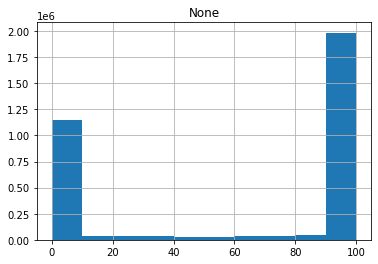

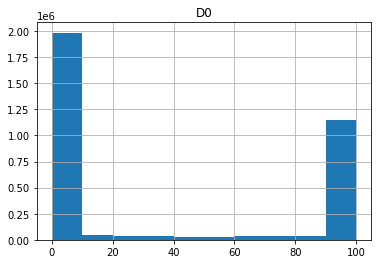

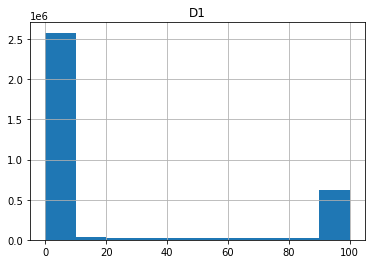

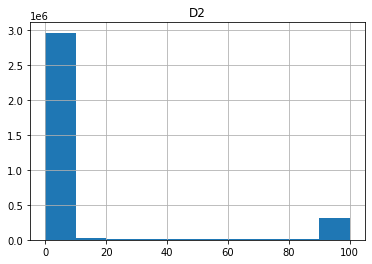

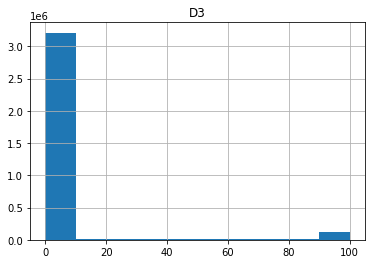

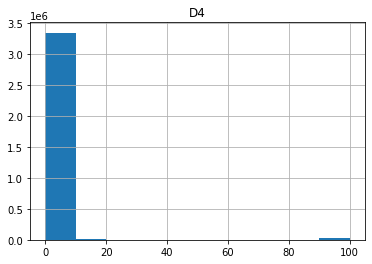

In [9]:
for cat in ['None', 'D0', 'D1', 'D2', 'D3', 'D4']:
    df_drought[cat].hist()
    plt.title(cat)
    plt.show()

In [10]:
(
    df_drought['None'].isin([100,0])&
    df_drought['D0'].isin([100,0])&
    df_drought['D1'].isin([100,0])&
    df_drought['D2'].isin([100,0])&
    df_drought['D3'].isin([100,0])&
    df_drought['D4'].isin([100,0])
).sum()/len(df_drought)

0.7171286329070534

71% of samples have categorical drought values

In [11]:
(
    (df_drought['None'].between(0,5)|df_drought['None'].between(95,100))&
    (df_drought['D0'].between(0,5)|df_drought['D0'].between(95,100))&
    (df_drought['D1'].between(0,5)|df_drought['D1'].between(95,100))&
    (df_drought['D2'].between(0,5)|df_drought['D2'].between(95,100))&
    (df_drought['D3'].between(0,5)|df_drought['D3'].between(95,100))&
    (df_drought['D4'].between(0,5)|df_drought['D4'].between(95,100))
).sum()/len(df_drought)

0.7775495206992649

77% of samples are almost categorical (within 5% of 100 or 0)

In [12]:
 4_000/192_000 # num of positive samples for solar flare prediction

0.020833333333333332

In [13]:
df_drought_max = df_drought[(
    (df_drought['None'].between(0,5)|df_drought['None'].between(95,100))&
    (df_drought['D0'].between(0,5)|df_drought['D0'].between(95,100))&
    (df_drought['D1'].between(0,5)|df_drought['D1'].between(95,100))&
    (df_drought['D2'].between(0,5)|df_drought['D2'].between(95,100))&
    (df_drought['D3'].between(0,5)|df_drought['D3'].between(95,100))&
    (df_drought['D4'].between(0,5)|df_drought['D4'].between(95,100))
)]

In [14]:
%%capture
df_drought_max.loc[:,'category'] = None
for cat in ['None', 'D0', 'D1', 'D2', 'D3', 'D4']:
    df_drought_max.loc[df_drought_max[cat] >= 95,'category'] = cat

In [15]:
df_drought_max

,fips,lat,lon,None,D0,D1,D2,D3,D4,date,category
0,1001,32.536382,-86.64449,100.00,0.00,0.0,0.0,0.0,0.0,2020-12-29,None
1,1001,32.536382,-86.64449,100.00,0.00,0.0,0.0,0.0,0.0,2020-12-22,None
2,1001,32.536382,-86.64449,100.00,0.00,0.0,0.0,0.0,0.0,2020-12-15,None
3,1001,32.536382,-86.64449,100.00,0.00,0.0,0.0,0.0,0.0,2020-12-08,None
4,1001,32.536382,-86.64449,100.00,0.00,0.0,0.0,0.0,0.0,2020-12-01,None
...,...,...,...,...,...,...,...,...,...,...,...
1091,56045,43.846213,-104.57002,100.00,0.00,0.0,0.0,0.0,0.0,2000-02-01,None
1092,56045,43.846213,-104.57002,3.93,96.07,0.0,0.0,0.0,0.0,2000-01-25,D0
1093,56045,43.846213,-104.57002,100.00,0.00,0.0,0.0,0.0,0.0,2000-01-18,None
1094,56045,43.846213,-104.57002,100.00,0.00,0.0,0.0,0.0,0.0,2000-01-11,None


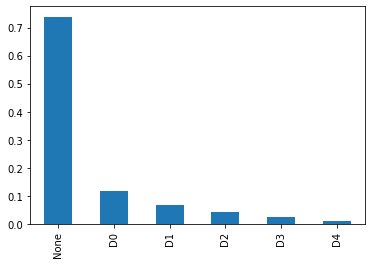

In [16]:
(df_drought_max['category'].value_counts()/len(df_drought_max)).plot(kind='bar')
plt.show()

In [17]:
df_drought_max['category'].value_counts()/len(df_drought_max)

None    0.738704
D0      0.118678
D1      0.066937
D2      0.042290
D3      0.023193
D4      0.010199
Name: category, dtype: float64

In [18]:
df_drought = df_drought_max[['fips','date','category']]

In [19]:
df_drought

,fips,date,category
0,1001,2020-12-29,None
1,1001,2020-12-22,None
2,1001,2020-12-15,None
3,1001,2020-12-08,None
4,1001,2020-12-01,None
...,...,...,...
1091,56045,2000-02-01,None
1092,56045,2000-01-25,D0
1093,56045,2000-01-18,None
1094,56045,2000-01-11,None


In [20]:
class2id = {
    'None': 0,
    'D0': 1,
    'D1': 2,
    'D2': 3,
    'D3': 4,
    'D4': 5,
}

In [21]:
value_types = [
    "PRECTOT",
    "PS",
    "QV2M",
    "T2M",
    "T2MDEW",
    "T2MWET",
    "T2M_MAX",
    "T2M_MIN",
    "T2M_RANGE",
    "TS",
    "WS10M",
    "WS10M_MAX",
    "WS10M_MIN",
    "WS10M_RANGE",
    "WS50M",
    "WS50M_MAX",
    "WS50M_MIN",
    "WS50M_RANGE"
]

In [22]:
num_days = 180

In [50]:
start_date = datetime(2000,1,1)
end_date = datetime(2010,1,1)

def create_fips_samples(fips):
    global start_date, end_date
    l_start_date = copy.copy(start_date) + relativedelta(years=1)
    l_end_date = copy.copy(end_date)
    #print(f'{fips}\n')
    np.random.seed(fips+int(l_start_date.timestamp()))
    county = fips
    num_days = 180 # approx. 3 months of data
    l_start_date = l_start_date + relativedelta(days=num_days+np.random.randint(num_days+1))
    county_df = df[df['fips']==county]
    samples = []
    current_date = None
    
    while l_start_date < l_end_date and len(county_df) > 0:
        sample = {}
        old_date = current_date
        current_date = df_drought[
            (df_drought['fips']==county)&
            (df_drought['date']>=l_start_date)
        ]['date'].min()
        if current_date >= l_end_date or pd.isnull(current_date) or old_date == current_date:
            break
            
        # past classes
        past_classes = df_drought[
            (df_drought['fips']==county)&
            (df_drought['date']<=current_date)
        ].sort_values('date')[-num_days:].copy()
        past_classes = past_classes.set_index('date')
        past_classes = past_classes.reindex(
            pd.date_range(start=past_classes.index.min(),
            end=past_classes.index.max(),
            freq='1D')
        )
        past_classes = past_classes.interpolate(
            method='pad',
            limit_direction='forward'
        )['category'].values[-num_days:]
        past_classes = [class2id[x] for x in past_classes]
        if len(past_classes) < num_days:
            l_start_date += relativedelta(days=num_days)
            continue
        
        # past year classes
        past_yr_classes = df_drought[
            (df_drought['fips']==county)&
            (df_drought['date']<=(current_date-relativedelta(years=1)))
        ].sort_values('date')[-num_days:].copy()
        past_yr_classes = past_yr_classes.set_index('date')
        past_yr_classes = past_yr_classes.reindex(
            pd.date_range(start=past_yr_classes.index.min(),
            end=past_yr_classes.index.max(),
            freq='1D')
        )
        past_yr_classes = past_yr_classes.interpolate(
            method='pad',
            limit_direction='forward'
        )['category'].values[-num_days:]
        past_yr_classes = [class2id[x] for x in past_yr_classes]
        if len(past_yr_classes) < num_days:
            l_start_date += relativedelta(days=num_days)
            continue
        
        # future classes
        fut_classes = df_drought[
            (df_drought['fips']==county)&
            (df_drought['date']>current_date)
        ].copy()
        fut_classes = fut_classes['category'].values[:12]
        fut_classes = [class2id[x] for x in fut_classes]
        if len(fut_classes) < 12:
            break
        
        sample['classes'] = past_classes
        sample['future_classes'] = fut_classes
        sample['past_year_classes'] = past_yr_classes
        sample['values'] = {}
        sample['past_year_values'] = {}
        values = {}
        past_year_values = {}
        
        vals = county_df[
            (county_df['date']<=np.datetime64(current_date))
        ][-num_days:]
        vals_prev_year = county_df[
            (county_df['date']<=np.datetime64(current_date-relativedelta(years=1)))
        ][-num_days:]
        #dates = vals['date']
        sample['meta'] = { 
            'date': current_date.date(),
            'fips': county,
            #'valueStartDate': dates.values[0],
            #'valueEndDate': dates.values[-1],
        }
        sorted_types = sorted(value_types)
        vals_raw = vals[sorted_types].values
        vals_prev_raw = vals_prev_year[sorted_types].values
        for i in range(len(value_types)):
            sample['values'][sorted_types[i]] = vals_raw[:,i]
            sample['past_year_values'][sorted_types[i]] = vals_prev_raw[:,i]
        sample_hash = str(hash(str(sample['meta']['date'])+str(sample['meta']['fips'])))
        samples.append((sample, sample_hash))
        l_start_date += relativedelta(days=num_days)
    return samples

In [38]:
start_date = datetime(2017,1,1)
end_date = datetime(2019,1,1)

numbers = df_drought['fips'].unique()
with h5py.File('sets/validation_set.h5py', 'w') as f:
    for number in tqdm(numbers.tolist()):
        for sample, sample_hash in create_fips_samples(number):
            dset = f.create_dataset(
                sample_hash, 
                (num_days, len(value_types)*2+2), 
                dtype='float32',
                compression='gzip'
            )
            count = 0
            for val in sorted(value_types):
                dset[:,count] = sample['values'][val]
                count += 1
            for val in sorted(value_types):
                dset[:,count] = sample['past_year_values'][val]
                count += 1
            dset[:,count] = sample['classes']
            count += 1
            dset[:,count] = sample['past_year_classes']
            date = sample['meta']['date']
            dset.attrs.create('date', [date.year, date.month, date.day], (3,), 'i8')
            dset.attrs.create('fips', sample['meta']['fips'], (1,), 'i8')
            dset.attrs.create('target', sample['future_classes'], (12,), 'i8')

In [51]:
start_date = datetime(2000,1,1)
end_date = datetime(2017,1,1)

numbers = df_drought['fips'].unique()
with h5py.File('sets/training_set.h5py', 'w') as f:
    for number in tqdm(numbers.tolist()):
        for sample, sample_hash in create_fips_samples(number):
            dset = f.create_dataset(
                sample_hash, 
                (num_days, len(value_types)*2+2), 
                dtype='float32',
                compression='gzip'
            )
            count = 0
            for val in sorted(value_types):
                dset[:,count] = sample['values'][val]
                count += 1
            for val in sorted(value_types):
                dset[:,count] = sample['past_year_values'][val]
                count += 1
            dset[:,count] = sample['classes']
            count += 1
            dset[:,count] = sample['past_year_classes']
            date = sample['meta']['date']
            dset.attrs.create('date', [date.year, date.month, date.day], (3,), 'i8')
            dset.attrs.create('fips', sample['meta']['fips'], (1,), 'i8')
            dset.attrs.create('target', sample['future_classes'], (12,), 'i8')

ValueError: Neither `start` nor `end` can be NaT

In [ ]:
start_date = datetime(2019,1,1)
end_date = datetime(2021,1,1)

numbers = df_drought['fips'].unique()
with h5py.File('sets/test_set.h5py', 'w') as f:
    for number in tqdm(numbers.tolist()):
        for sample, sample_hash in create_fips_samples(number):
            dset = f.create_dataset(
                sample_hash, 
                (num_days, len(value_types)*2+2), 
                dtype='float32',
                compression='gzip'
            )
            count = 0
            for val in sorted(value_types):
                dset[:,count] = sample['values'][val]
                count += 1
            for val in sorted(value_types):
                dset[:,count] = sample['past_year_values'][val]
                count += 1
            dset[:,count] = sample['classes']
            count += 1
            dset[:,count] = sample['past_year_classes']
            date = sample['meta']['date']
            dset.attrs.create('date', [date.year, date.month, date.day], (3,), 'i8')
            dset.attrs.create('fips', sample['meta']['fips'], (1,), 'i8')
            dset.attrs.create('target', sample['future_classes'], (12,), 'i8')